# Exercise: Big Picture, Decision Making, Mini Project

We have revisited what we have learned so far and discussed the importance of model assessment and parameter optimization.

The goal of this exercise is to take our learnings a little bit further.

Answer below questions.
The code snippeds already contained in the notebook will provide you with hints.

- **For each question, give the answer by adding it to this cell.**
- **Submit your answers through this [form](https://forms.gle/qzdiHYvuhFZoZHUn8).**


## Questions
### Big Picture
You are responsible for the implementation/rollout of a ML based system.

1. Based on what you have learned so far, go through this [project checklist](https://tdgunes.com/COMP6246-2018Fall/lab1/extra1_3.pdf) (taken from the Hands On ML book) and select the three single items (not headlines but specific actions) you consider most important.
   **In addition, add your choice to this Google form [Google form](https://forms.gle/aGWiGv72U6uZWd696).**

### Decision Making
A ML system should be used to automate a classification problem. Perform a simple 
analysis by computing the [expected value](https://en.wikipedia.org/wiki/Expected_value) as $\textrm{expected value} = \sum_{\textrm{all possible events}} \textrm{probability of event} * \textrm{value of event}$ (side note: this is similar to [risk assessment](https://en.wikipedia.org/wiki/Risk#Risk_assessment_and_analysis)).
   
As an example, revisit our toy classification problem for the moons data set and consider the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) (or [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)) below.
For each possible outcome, we expect the following value, i.e. profit or loss:
- The model correctly predicts a positive outcome: 300
- The model correctly predicts a negative outcome: 100
- The model falsely predicts a positive outcome: -2000
- The model falsely predicts a negative outcome: -200


2. What is the expected value?
3. Based on your assessment, do you recommend to use the ML system or not? Provide an 
   explanation

### Mini Project
You are tasked with predicting the value of assets.

As an example, we consider "[california housing prices](https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset)".

4. List three specific tasks you consider important in tackling this problem.
5. Perform three specific tasks (not necessarily the same) to approach a solution and describe your findings.

## Answers

### Big Picture
1. TBD in class

### Decision Making
2. -100
3. As the expected value is negative, we expect a loss, hence we do not recommend the use 
   of this system. Yet, as the total number of events is rather small, we have to take 
   this assessment with a grain of salt. Further investigation may be necessary.

### Mini Project
4. Some important tasks include:
  - Split train and test data
  - Data exploration:
    - Compute data summary
    - Compute correlations
    - Visualize using scatter plots
  - Fit a baseline model:
    - E.g. using linear regression
    - Compute metrics to assess performance
    - Visualize errors
  - Fit another model for comparison
  - Perform hyperparameter optimization using CV grid search
  - Assess variable importance
  - Discuss results, perform plausibility check
  - ...
5. See below

## Examples

### Big Picture

*TBD in class*

### Decision Making

In [1]:
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

In [2]:
# given data
X, y = make_moons(n_samples=200, noise=0.4, random_state=123)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
# model
# the focus of this exercise is **not** to optimize the model
# you can leave the parameters as is
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)
# prediction
yp_test = model.predict(X_test)

In [3]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [4]:
# please note that the confusion matrix on Wikipedia is transposed (rows and columns swapped)
conf_mat = confusion_matrix(y_test, yp_test)
conf_mat

array([[17,  7],
       [ 1, 25]])

In [5]:
conf_mat.ravel()

array([17,  7,  1, 25])

In [6]:
tn, fp, fn, tp = conf_mat.ravel()  # see help above
print('tn:', tn)
print('fp:', fp)
print('fn:', fn)
print('tp:', tp)

tn: 17
fp: 7
fn: 1
tp: 25


In [7]:
# total number of events
n_total = conf_mat.sum()
n_total

50

In [8]:
# according to instruction
# - The model correctly predicts a positive outcome: 300
# - The model correctly predicts a negative outcome: 100
# - The model falsely predicts a positive outcome: -2000
# - The model falsely predicts a negative outcome: -200

value_tp = 300
value_tn = 100
value_fp = -2000
value_fn = -200

total_value = tn * value_tn + fp * value_fp + fn * value_fn + tp * value_tp
total_value

-5000

In [9]:
expected_value = total_value / n_total
expected_value

-100.0

### Mini Project

In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data
feature_names = data['feature_names']
target_name = 'price'

# as dataframe
df = pd.DataFrame(data['data'], columns=feature_names)
df[target_name] = data['target']

# as plain arrays
X = data['data']
y = data['target']

In [11]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
# make up your mind and think about variable importance, what variable do you think matter most?

In [13]:
# how does it look like
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
# rough data summary
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
# compute correlations
df.corr(method='pearson').style.format('{:.2f}').background_gradient()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
price,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


In [16]:
df.corr(method='spearman').style.format('{:.2f}').background_gradient()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.00,-0.15,0.64,-0.25,0.01,-0.04,-0.09,-0.01,0.68
HouseAge,-0.15,1.00,-0.23,-0.12,-0.28,-0.02,0.03,-0.15,0.07
AveRooms,0.64,-0.23,1.00,0.08,-0.11,0.02,0.13,-0.04,0.26
AveBedrms,-0.25,-0.12,0.08,1.00,0.03,-0.13,0.05,0.01,-0.13
Population,0.01,-0.28,-0.11,0.03,1.00,0.24,-0.12,0.12,0.00
AveOccup,-0.04,-0.02,0.02,-0.13,0.24,1.00,-0.15,0.18,-0.26
Latitude,-0.09,0.03,0.13,0.05,-0.12,-0.15,1.00,-0.88,-0.17
Longitude,-0.01,-0.15,-0.04,0.01,0.12,0.18,-0.88,1.00,-0.07
price,0.68,0.07,0.26,-0.13,0.00,-0.26,-0.17,-0.07,1.00


In [17]:
# we observe:
# - rather strong positive correlation between MedInc and price
# - positive correlation between AveRooms and price (the more rooms, the higher the price)
# - negative correlation between AveOccup and price (the greater occupancy, the smaller the price)
#
# difference in pearson and spearman correlation indicates non-linear relationships

In [18]:
# create smaller (random) subsample to speed up scatter matrix
df_small = df.sample(n=5000)

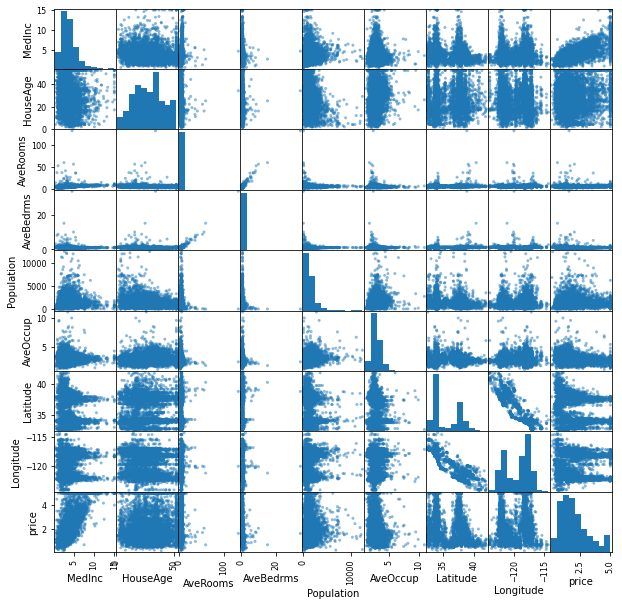

In [19]:
axs = pd.plotting.scatter_matrix(df_small, figsize=(10, 10))

In [20]:
# Observations:
# - scatter matrix looks like that some areas are pricier than others
# - outliers (!) distort the picture
# - some variable are capped, like price and house age

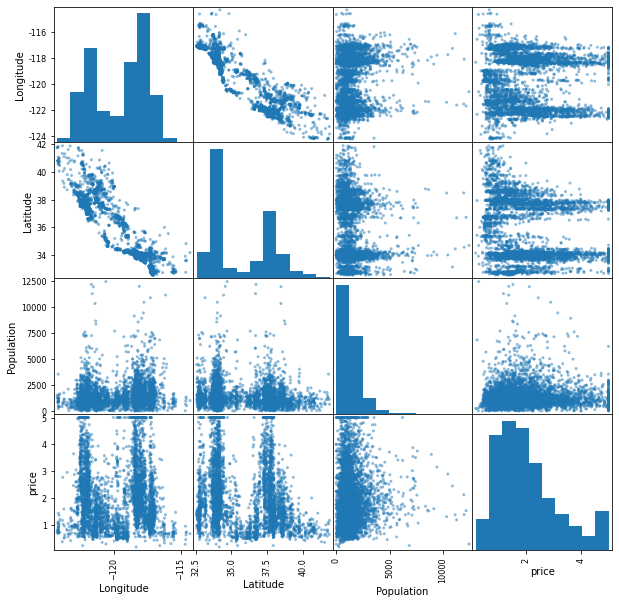

In [21]:
axs = pd.plotting.scatter_matrix(df_small[['Longitude', 'Latitude', 'Population', 'price']], figsize=(10, 10))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

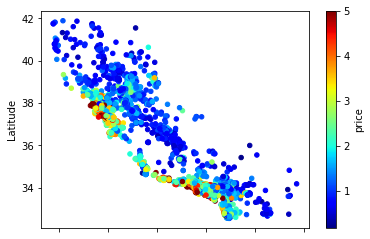

In [22]:
# Latitude and Longitude to indeed matter
df_small.plot.scatter(x='Longitude', y='Latitude', c='price', cmap='jet')

How does California look like? --> [Google Maps](https://www.google.at/maps/place/California,+USA/)

Demography --> 

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/California_population_map.png" alt="https://en.wikipedia.org/wiki/California#Demography" width="500">

Observations:
- San Francisco and Los Angeles are expensive
- Seaside more expensive than country side

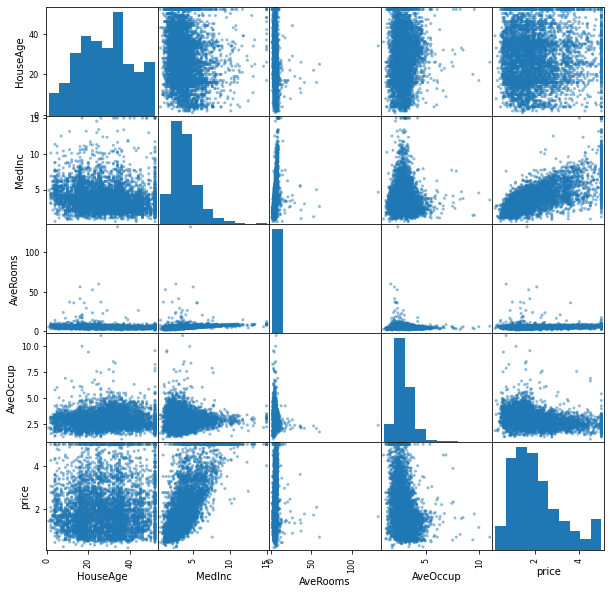

In [23]:
# let's take a closer look at the variables that seemed interesting based on their
# correlation with price
axs = pd.plotting.scatter_matrix(df_small[['HouseAge', 'MedInc', 'AveRooms', 'AveOccup', 'price']], figsize=(10, 10))

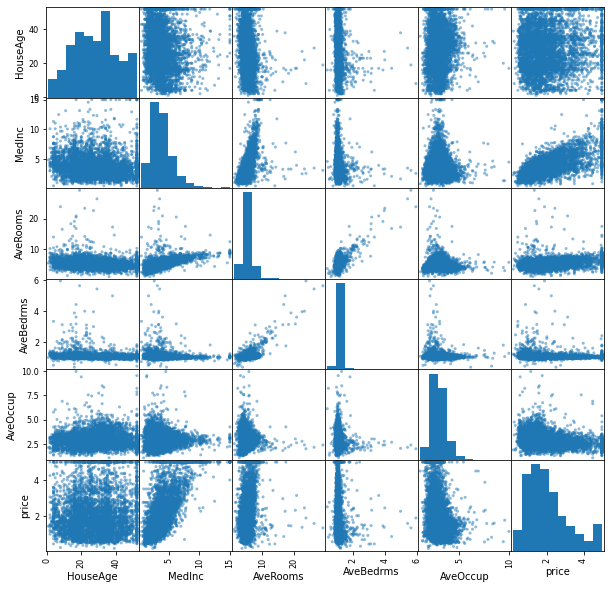

In [24]:
# filter (subset) to get rid off the outliers
df_small_filtered = df_small[df_small['AveRooms'] < 30]
df_small_filtered = df_small_filtered[df_small_filtered['AveOccup'] < 10]
df_small_filtered = df_small_filtered[df_small_filtered['AveBedrms'] < 6]

axs = pd.plotting.scatter_matrix(df_small_filtered[['HouseAge', 'MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'price']], figsize=(10, 10))

In [25]:
# fit a random forest to use its feature importance estimate to gain additional insight
# we do *not* use this model for actual prediction purposes
# this is just a quick shot to better understand what is going on
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, oob_score=True)
model.fit(X, y)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [26]:
model.score(X, y), model.oob_score_  # maybe we are overfitting here

(0.9748063918942799, 0.8152010024063101)

In [27]:
yp = model.predict(X)

Text(0, 0.5, 'yp')

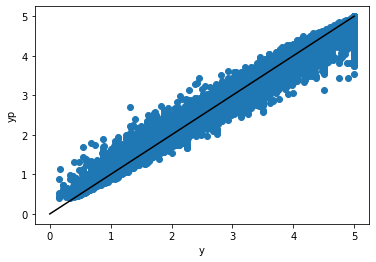

In [28]:
# plot predicted vs observed to see if we are making any systematic errors
# --> we seem to overestimated cheaper and unerestimate more expensive houses
fig, ax = plt.subplots()
ax.scatter(y, yp)
ax.plot([0, 5], [0, 5], color='black')
ax.set_xlabel('y')
ax.set_ylabel('yp')

In [29]:
df_feature_importances = pd.DataFrame({'feature_name': feature_names, 
                                       'feature_importance': model.feature_importances_})
df_feature_importances.sort_values('feature_importance', ascending=False)

,feature_name,feature_importance
0,MedInc,0.520514
5,AveOccup,0.136269
6,Latitude,0.093142
7,Longitude,0.091718
1,HouseAge,0.052710
2,AveRooms,0.044817
4,Population,0.031503
3,AveBedrms,0.029327


<AxesSubplot:xlabel='feature_name'>

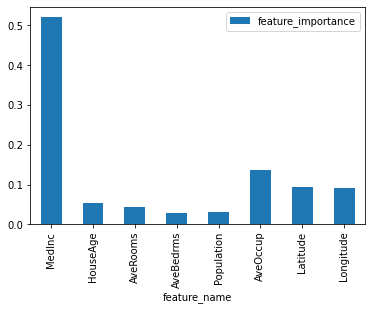

In [30]:
df_feature_importances.plot.bar(x='feature_name', y='feature_importance')

# Note that until here we have so far *only* performed data exploration!